In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
crudoil = pd.read_excel('./dataset/MTcars.xlsx')
crudoil.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


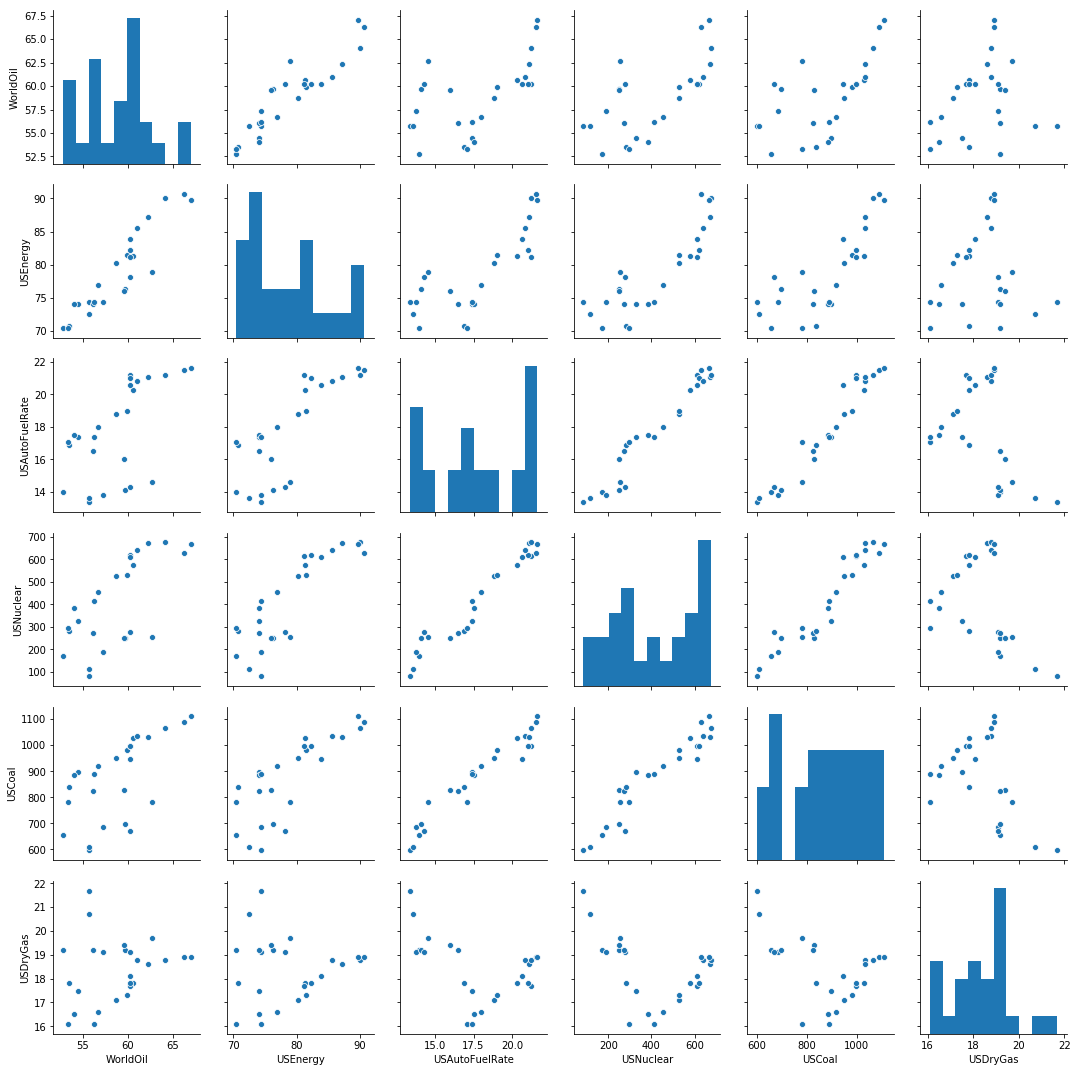

In [3]:
sns.pairplot(crudoil)

In [4]:
corr= crudoil.corr()
corr

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
WorldOil,1.000000,0.923252,0.585232,0.670815,0.623787,0.214418
USEnergy,0.923252,1.000000,0.790683,0.855757,0.791121,0.057034
USAutoFuelRate,0.585232,0.790683,1.000000,0.972109,0.967919,-0.422824
USNuclear,0.670815,0.855757,0.972109,1.000000,0.952128,-0.404187
USCoal,0.623787,0.791121,0.967919,0.952128,1.000000,-0.448483
USDryGas,0.214418,0.057034,-0.422824,-0.404187,-0.448483,1.000000


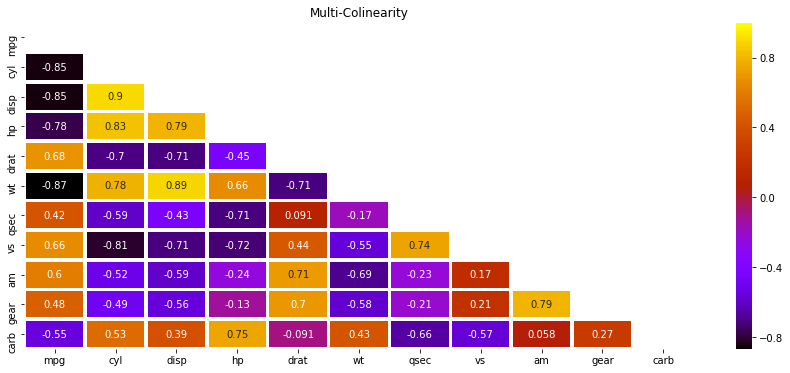

In [26]:
plt.figure(figsize=(15,6))
corr = crudoil.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,linewidths=2.5,mask=mask,
            cmap='gnuplot',annot=True)
plt.title('Multi-Colinearity')

plt.show()

In [27]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [28]:
crudoil.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [30]:
model=smf.ols(formula='mpg~cyl+disp+hp+drat+wt+qsec+vs+am+gear+carb',data=crudoil).fit()

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           3.79e-07
Time:                        11:17:02   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3034     18.718      0.657      0.5

# Feature Selection

> ## StepWise Regression

In [45]:
def pvalues(model):
    return pd.Series(data=[model.pvalues[-1]],index=[model.pvalues.index[-1]])

In [46]:
independent = list(crudoil.keys())[1:]
independent

['USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal', 'USDryGas']

In [47]:
independent.remove('USAutoFuelRate')

In [48]:
independent

['USEnergy', 'USNuclear', 'USCoal', 'USDryGas']

In [54]:
pv = pd.Series([])
for vari in independent:
    formula = "WorldOil~USEnergy+USAutoFuelRate+%s"%(vari)
    model = smf.ols(formula,data=crudoil).fit()
    pval = model.pvalues[-1]
    ind = model.pvalues.index[-1]
    pvc = pvalue(pval,ind)
    pv = pd.concat((pv,pvc))

In [51]:
pv.sort_values()

Series([], dtype: float64)

In [52]:
def pvalue(p,index):
    val = pd.Series(data=p,index=[index])
    return val

In [53]:
pvalue(7,index='srikanth')

srikanth    7
dtype: int64

### Feature - 1 

In [55]:
for var in independent:
    formula = 'WorldOil~{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)
        
pval.sort_values()
print('pvalue of {} is lowest which is {}'.format(pval.index[0],pval[0]))

pvalue of USEnergy is lowest which is 1.8551872323861467e-11


In [56]:
feature1 = pval.index[0]
feature1

'USEnergy'

### Feature - 2

In [57]:
independent.remove(feature1)

In [58]:
independent

['USNuclear', 'USCoal', 'USDryGas']

In [59]:
pval=[]
for var in independent:
    formula = 'WorldOil~USEnergy+{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)
        
pval.sort_values()
print('pvalue of {} is lowest which is {}'.format(pval.index[0],pval[0]))

pvalue of USNuclear is lowest which is 0.0015217552517932018


In [60]:
pval

USNuclear    0.001522
USCoal       0.022730
USDryGas     0.035750
dtype: float64

### Feature -3

In [62]:
pval=[]
for var in independent:
    formula = 'WorldOil~USEnergy+USAutoFuelRate+{}'.format(var)
    model = smf.ols(formula,data = crudoil).fit()
    try:   
        pval = pd.concat((pval,pvalues(model)))
    except:
        pval = pvalues(model)

print(pval.sort_values())
print('\n')
print('pvalue of {} is lowest which is {}'.format(pval.sort_values().index[0],pval.sort_values()[0]))

USCoal       0.102247
USDryGas     0.650380
USNuclear    0.672102
dtype: float64


pvalue of USCoal is lowest which is 0.10224701823629695


> "USCoal" ***P-value*** = 0.10224 > 0.025 (significance level)

Hence, don't consider from values
Hence features for crudoil are : 'USEnergy' and 'USAutoFuelRate'

In [63]:
model_forwad = smf.ols(formula='WorldOil~USEnergy+USAutoFuelRate',data=crudoil).fit()
print(model_forwad.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 11 Mar 2019   Prob (F-statistic):           1.17e-12
Time:                        14:32:28   Log-Likelihood:                -40.471
No. Observations:                  26   AIC:                             86.94
Df Residuals:                      23   BIC:                             90.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.1403      3.513      2.

In [64]:
USEnergy = 72.5
USAutoFuelRate = 13.6

worldOil = 0.7720 * USEnergy  - 0.5173 * USAutoFuelRate
print('INFO: WorldOil =',worldOil)

INFO: WorldOil = 48.93472


# Backward Elimination 

### Full Model

In [65]:
crudoil.keys()

Index(['WorldOil', 'USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal',
       'USDryGas'],
      dtype='object')

In [66]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

Intercept         0.764250
USDryGas          0.752753
USNuclear         0.514197
USAutoFuelRate    0.196018
USCoal            0.192596
USEnergy          0.000159
dtype: float64

### Drop values for worst pvalue
> dropping *'USDryGas'*

In [67]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

Intercept         6.380683e-01
USNuclear         5.276771e-01
USCoal            9.579508e-02
USAutoFuelRate    8.628793e-02
USEnergy          2.503312e-09
dtype: float64

### Drop values for worst pvalue
> dropping 'USNuclear'

In [68]:
formula = 'WorldOil~USEnergy+USAutoFuelRate+USCoal'.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

USCoal            1.022470e-01
Intercept         2.313101e-02
USAutoFuelRate    4.787754e-03
USEnergy          4.406243e-11
dtype: float64

### Drop values for worst pvalue
> dropping 'USCoal'

In [46]:
formula = 'mpg~drat+wt+qsec+am+carb'#.format(var)
model = smf.ols(formula,data = crudoil).fit()
model.pvalues.sort_values(ascending=False)

drat         0.395620
Intercept    0.240348
carb         0.185826
am           0.079391
qsec         0.017477
wt           0.001988
dtype: float64

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     32.15
Date:                Tue, 12 Mar 2019   Prob (F-statistic):           2.42e-10
Time:                        11:20:23   Log-Likelihood:                -70.829
No. Observations:                  32   AIC:                             153.7
Df Residuals:                      26   BIC:                             162.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9243      8.259      1.202      0.240      -7.053      26.901
drat           1.2071      1.397      0.864      0.396      -1.665       4.080
wt            -3.1108      0.905     -3.437      0.002      -4.971      -1.251
qsec           0.9145      0.360      2.538      0.017       0.174       1.655
am             2.9639      1.623      1.826      0.079      -0.373       6.301
carb          -0.6023      0.443     -1.359      0.186      -1.513       0.309
==============================================================================
Omnibus:                        0.996   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.988
Skew:                           0.286   Prob(JB):                        0.610
Kurtosis:                       2.356   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Both the values are significant
Hence, USAutoFuelRate and US Energy are significant feature

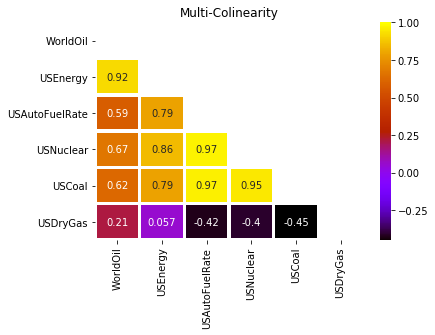

In [70]:
corr = crudoil.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,linewidths=2.5,mask=mask,cmap='gnuplot',annot=True)
plt.title('Multi-Colinearity')
plt.show()

# Stepwise AIC
AIC = Akaike information criterion

In [32]:
from sklearn.linear_model import LinearRegression

In [36]:
model_sk = LinearRegression()

In [38]:
X = crudoil.iloc[:,2:]
y = crudoil.iloc[:,1:2]

In [40]:
model_sk.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
from sklearn.feature_selection import RFE

In [42]:
m = RFE(model_sk).fit(X,y)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
m.support_

array([False, False, False,  True,  True,  True, False,  True, False,
        True])

In [44]:
list(X.T.loc[m.support_].index)

['drat', 'wt', 'qsec', 'am', 'carb']

In [45]:
m.ranking_

array([4, 6, 5, 1, 1, 1, 3, 1, 2, 1])

# Good Job